# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends:

1. The first trend observed is, the climate in southern hemisphere tends to be milder than those of the similar latitudes in the northern hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land. 
2. The second trend that I could analyse is, highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.
3. The third observed trend is that,the speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed. Latitude doesnot have strong influence on thee wind speed.

In [1]:
# Importing Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Importing API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Creating lists to hold lat & lon values and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm enough count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating all the list varaibles to hold all the data from the API responses accordingly
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, doing the  below things
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : morro bay
Processing Record 2 of Set 1 : kamiiso
Processing Record 3 of Set 1 : busselton
Processing Record 4 of Set 1 : port elizabeth
City not found. Skipping...
Processing Record 5 of Set 1 : touros
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 : acari
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : hirtshals
Processing Record 10 of Set 1 : kapaa
Processing Record 11 of Set 1 : hermanus
Processing Record 12 of Set 1 : kribi
Processing Record 13 of Set 1 : dumas
Processing Record 14 of Set 1 : esperance
Processing Record 15 of Set 1 : upernavik
Processing Record 16 of Set 1 : vostok
Processing Record 17 of Set 1 : lebanon
Processing Record 18 of Set 1 : hofn
Processing Record 19 of Set 1 : waddan
Processing Record 20 of Set 1 : vaini
Processing Record 21 of Set 1 : yellowknife
City not found. Skippin

Processing Record 34 of Set 4 : labuhan
Processing Record 35 of Set 4 : sioux lookout
Processing Record 36 of Set 4 : rocha
Processing Record 37 of Set 4 : bayir
Processing Record 38 of Set 4 : shizunai
Processing Record 39 of Set 4 : hirara
Processing Record 40 of Set 4 : cockburn town
Processing Record 41 of Set 4 : kulhudhuffushi
Processing Record 42 of Set 4 : charlestown
Processing Record 43 of Set 4 : boden
Processing Record 44 of Set 4 : nago
Processing Record 45 of Set 4 : vestmannaeyjar
City not found. Skipping...
Processing Record 46 of Set 4 : ratne
Processing Record 47 of Set 4 : cherskiy
Processing Record 48 of Set 4 : nome
Processing Record 49 of Set 4 : muniz freire
Processing Record 50 of Set 4 : klaksvik
Processing Record 0 of Set 5 : novo aripuana
Processing Record 1 of Set 5 : luderitz
Processing Record 2 of Set 5 : margate
Processing Record 3 of Set 5 : rosarito
Processing Record 4 of Set 5 : atlantic city
Processing Record 5 of Set 5 : rio gallegos
Processing Recor

Processing Record 20 of Set 8 : levelland
Processing Record 21 of Set 8 : elk city
Processing Record 22 of Set 8 : awjilah
Processing Record 23 of Set 8 : iquique
City not found. Skipping...
Processing Record 24 of Set 8 : altamira
Processing Record 25 of Set 8 : caravelas
City not found. Skipping...
Processing Record 26 of Set 8 : marau
Processing Record 27 of Set 8 : baloda bazar
Processing Record 28 of Set 8 : salalah
Processing Record 29 of Set 8 : flinders
Processing Record 30 of Set 8 : huarmey
Processing Record 31 of Set 8 : beringovskiy
Processing Record 32 of Set 8 : vallenar
Processing Record 33 of Set 8 : carnarvon
Processing Record 34 of Set 8 : sassandra
Processing Record 35 of Set 8 : lerwick
Processing Record 36 of Set 8 : sokoto
City not found. Skipping...
Processing Record 37 of Set 8 : gilgit
Processing Record 38 of Set 8 : raga
Processing Record 39 of Set 8 : chimbarongo
Processing Record 40 of Set 8 : puerto el triunfo
Processing Record 41 of Set 8 : tuatapere
Proce

Processing Record 4 of Set 12 : tazovskiy
Processing Record 5 of Set 12 : endicott
Processing Record 6 of Set 12 : sao filipe
Processing Record 7 of Set 12 : skibbereen
Processing Record 8 of Set 12 : ranong
Processing Record 9 of Set 12 : borogontsy
Processing Record 10 of Set 12 : le vauclin
Processing Record 11 of Set 12 : mayumba
Processing Record 12 of Set 12 : hami
Processing Record 13 of Set 12 : thomastown
Processing Record 14 of Set 12 : paamiut
Processing Record 15 of Set 12 : igarka
Processing Record 16 of Set 12 : key west
Processing Record 17 of Set 12 : sijunjung
Processing Record 18 of Set 12 : addanki
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Creating a Final Dataframe with all the data retrieved above using API calls
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list})   
#Saving the whole data into a .csv file
city_data_df.to_csv("D:/Homework/python-api-challenge/WeatherPy/Output_data/Cities.csv", index = False)


#Displaying the final Dataframe
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morro Bay,35.3658,-120.8499,45.00,92,25,3.24,US,1616073534
1,Kamiiso,41.8167,140.6500,34.47,80,2,9.64,JP,1616073535
2,Busselton,-33.6500,115.3333,70.00,81,100,1.01,AU,1616073536
3,Port Elizabeth,-33.9180,25.5701,77.00,78,0,19.57,ZA,1616073537
4,Touros,-5.1989,-35.4608,82.40,78,75,8.05,BR,1616073538


In [16]:
#Displaying all the mathematical calculations on numeric columns
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.351365,17.546525,56.112867,71.654577,52.740933,8.042124,1.616074e+09
std,33.006877,90.385090,28.937898,21.925910,40.183729,5.534728,1.592054e+02
min,-54.800000,-175.200000,-39.320000,1.000000,0.000000,0.180000,1.616073e+09
25%,-7.714050,-63.203450,37.990000,62.000000,3.500000,3.660000,1.616074e+09
50%,23.133300,19.934800,64.400000,78.000000,62.000000,6.910000,1.616074e+09
75%,46.001550,97.917400,78.620000,87.000000,90.000000,11.500000,1.616074e+09
max,78.218600,179.316700,106.210000,100.000000,100.000000,31.070000,1.616074e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#Checking the highest humidity value 
city_data_df["Humidity"].max()


100

As the highest humidity value is 100, Skipping the steps of filtering the humidity column and the whole dataframe

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

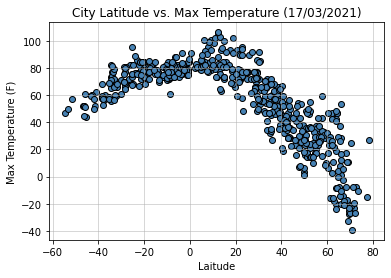

In [18]:
# Creating Latitude vs. Temperature scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Setting title
plt.title("City Latitude vs. Max Temperature (17/03/2021)")

# Setting x axis label
plt.xlabel("Laitude")

# Setting y axis label
plt.ylabel("Max Temperature (F)")

# Setting grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as .pngs
plt.savefig("D:/Homework/python-api-challenge/WeatherPy/Output_data/Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

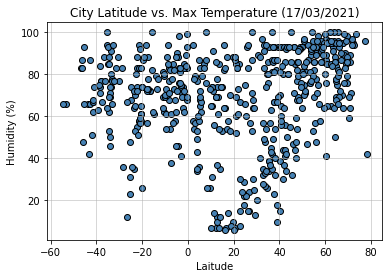

In [14]:
# Creating Latitude vs. Humidity scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Setting title
plt.title("City Latitude vs. Max Temperature (17/03/2021)")

# Setting x axis label
plt.xlabel("Laitude")

# Setting y axis label
plt.ylabel("Humidity (%)")

# Setting grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as .pngs
plt.savefig("D:/Homework/python-api-challenge/WeatherPy/Output_data/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

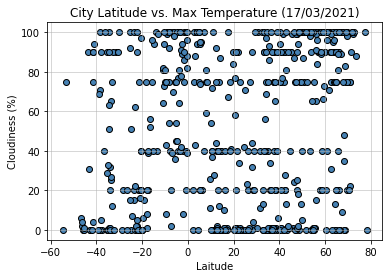

In [15]:
# Creating Latitude vs. Cloudiness scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Setting title
plt.title("City Latitude vs. Max Temperature (17/03/2021)")

# Setting x axis label
plt.xlabel("Laitude")

# Setting y axis label
plt.ylabel("Cloudiness (%)")

# Setting grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Saving the plotted figure as .pngs
plt.savefig("D:/Homework/python-api-challenge/WeatherPy/Output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

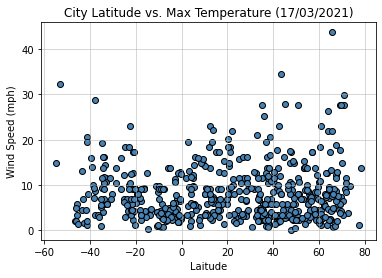

In [16]:
# Creating Latitude vs. Cloudiness scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Setting title
plt.title("City Latitude vs. Max Temperature (17/03/2021)")

# Setting x axis label
plt.xlabel("Laitude")

# Setting y axis label
plt.ylabel("Wind Speed (mph)")

# Setting grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Setting the plotted figure as .pngs
plt.savefig("D:/Homework/python-api-challenge/WeatherPy/Output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [76]:
#Creating the northern and southern hemispheres using the Latitude 
northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]


In [77]:
# Defining a  function for calculating linear regression and scatter plot for all the relationships
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Defining a fuction for annotating the regression line
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


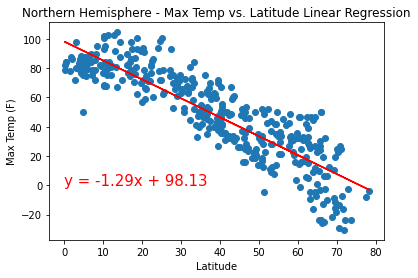

In [78]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Calling annotation function
annotate(line_equation,0,0)

# Setting a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Max Temp (F)")


There is a very strong negative correlation between Max Temperature and Latitude values in the Northern Hemisphere.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.68


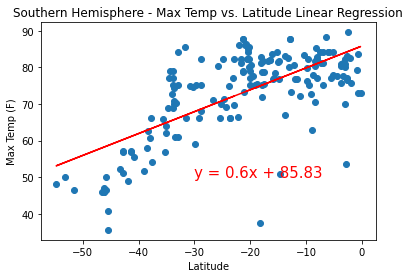

In [86]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Calling annotation function
annotate(line_equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

The Max Temperature and Latitude values in the Southern Hemisphere are moderately correlated

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35


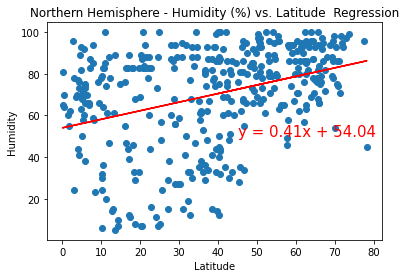

In [80]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Calling annotation function
annotate(line_equation,45,50)

# Setting a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Humidity")

There is weak correlation between Humidity and Latitude values in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


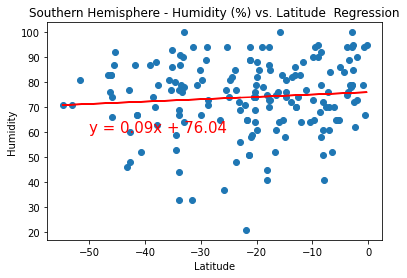

In [81]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Calling annotation function
annotate(line_equation,-50,60)

# Setting a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Humidity")

There is weak positive correlation between Humidity and Latitude in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.12


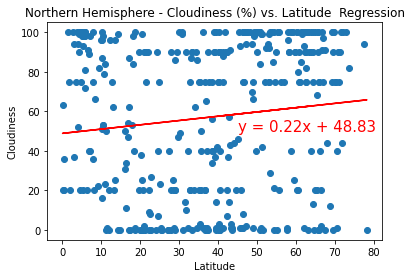

In [82]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Calling  annotation function
annotate(line_equation,45,50)

# Setting a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Cloudiness")

There is a weak postive correlation between Cloudiness and Latitude values in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33


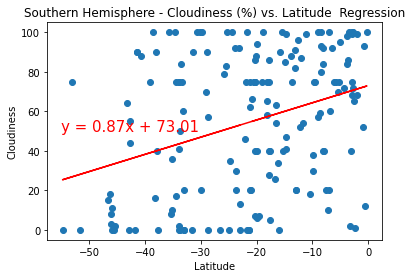

In [83]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Calling  annotation function
annotate(line_equation,-55,50)

# Setting a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Cloudiness")

There is a weak positive correlation between Cloudiness and Latitude Values in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


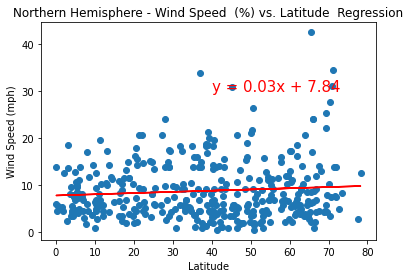

In [84]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Calling  annotation function
annotate(line_equation,40,30)

# Setting a title
plt.title("Northern Hemisphere - Wind Speed  (%) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Wind Speed (mph)")

There is a weak positive correlation between Wind Speed and Latitude values in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.31


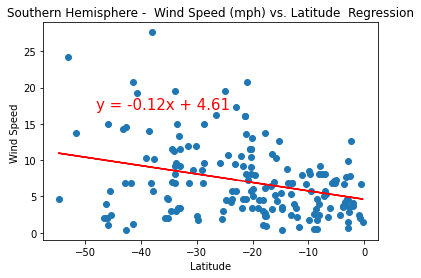

In [85]:
# Calling the Line Regression function for the analysis
line_equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Calling  annotation function
annotate(line_equation,-48,17)

# Setting a title
plt.title("Southern Hemisphere -  Wind Speed (mph) vs. Latitude  Regression")

# Setting xlabel
plt.xlabel("Latitude")

# Setting ylabel
plt.ylabel("Wind Speed ")

There is a weak negative correlation between Wind Speed and Latitude values in the Southern Hemisphere